In [1]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [2]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [13]:
print(train.data[1])

From: MANDTBACKA@finabo.abo.fi (Mats Andtbacka)
Subject: Re: If There Were No Hell
Organization: Unorganized Usenet Postings UnInc.
Lines: 26

In <May.5.02.51.25.1993.28737@athos.rutgers.edu> shellgate!llo@uu4.psi.com writes:

> Here's a question that some friends and I were debating last night.
> Q: If you knew beyond all doubt that hell did not exist and that
>    unbelievers simply remained dead, would you remain a Christian?

      (Reasoning pertinent to believing Xians deleted for space)

      It strikes me, for no apparent reason, that this is reversible.
I.e., if I had proof that there existed a hell, in which I would be
eternally punished for not believing in life, would that make me a Xian?
(pardon my language) _Bloody_hell_no_!

      ...Of course, being merely a reversal of your thinking, this
doesn't add anything _new_ to the debate, but...

> Several friends disagreed, arguing the fear of hell was necessary
> to motivate people to Christianity. To me that fatally undercu

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [14]:
model.fit(train.data, train.target)
labels = model.predict(test.data)
print(labels)

[2 0 1 ... 1 2 1]


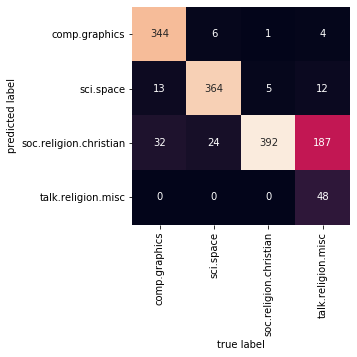

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [10]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [22]:

data = "landslides and occasionally, volcanic activity."
predict_category(data)

'sci.space'